In [1]:
from scipy.io import netcdf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import glob
import geopandas as gpd
import pandas as pd

elevation data source
* https://datacatalog.worldbank.org/search/dataset/0037910

coastal created manually in QGIS

HDI source
* https://globaldatalab.org/shdi/table/

population density data source
* https://hub.worldpop.org/geodata/summary?id=46241

age distribution (download all age 60 or higher rasters for male and female)

* https://hub.worldpop.org/geodata/listing?id=88

population total to divide age subset (to get proportion of population above X years old)

* https://hub.worldpop.org/geodata/summary?id=49919





## Elevation

In [2]:
zones = "/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/adm0_shp/india/clean_shp.shp"

gdf = gpd.read_file(zones)

In [3]:
gdf['adm1'].unique()

array(['Jammu and Kashmir', 'Himachal Pradesh', 'Punjab', 'Chandigarh',
       'Uttarakhand', 'Haryana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Bihar', 'Sikkim', 'Arunachal Pradesh', 'Nagaland', 'Manipur',
       'Mizoram', 'Tripura', 'Meghalaya', 'Assam', 'West Bengal',
       'Jharkhand', 'Odisha', 'Chhattisgarh', 'Madhya Pradesh', 'Gujarat',
       'Daman and Diu', 'Dadra and Nagar Haveli', 'Maharashtra',
       'Andhra Pradesh', 'Karnataka', 'Goa', 'Lakshadweep', 'Kerala',
       'Tamil Nadu', 'Puducherry', 'Andaman and Nicobar Islands',
       'Telangana', 'Ladakh'], dtype=object)

<Axes: >

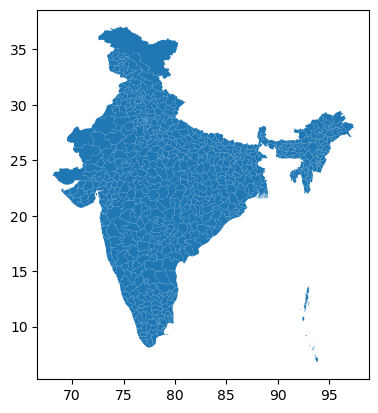

In [4]:
gdf.plot()

In [6]:
import geopandas as gpd
from rasterstats import zonal_stats


In [42]:
import geopandas as gpd
from rasterstats import zonal_stats

zones = "/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/adm0_shp/india/clean_shp.shp"
values = "/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/elevation/ELE.tif"

gdf = gpd.read_file(zones)

stats = gpd.GeoDataFrame(zonal_stats(gdf, values, stats=["mean"]))
gdf = gdf.join(stats)


In [43]:
gdf.rename(columns = {'mean':'mean_elev'}, inplace=True)

Text(0.5, 1.0, 'Average elevation (m) in Indian districts')

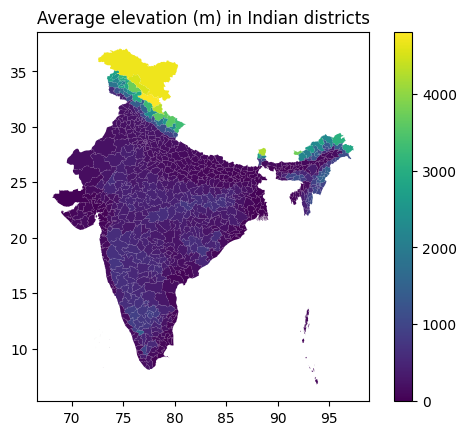

In [44]:
gdf.plot(column='mean_elev', legend=True )
plt.title("Average elevation (m) in Indian districts")

In [45]:
gdf['location'] = gdf['adm2'] + ', ' + gdf['adm1']

In [46]:
gdf

,adm2,adm1,location,geometry,mean_elev
0,Kupwara,Jammu and Kashmir,"Kupwara, Jammu and Kashmir","POLYGON ((74.33744 34.78209, 74.34695 34.78019...",2512.641791
1,Bandipore,Jammu and Kashmir,"Bandipore, Jammu and Kashmir","POLYGON ((74.73338 34.67121, 74.74956 34.66883...",3148.596486
2,Baramula,Jammu and Kashmir,"Baramula, Jammu and Kashmir","POLYGON ((74.51946 34.42533, 74.52090 34.42237...",2179.357662
3,Ganderbal,Jammu and Kashmir,"Ganderbal, Jammu and Kashmir","POLYGON ((74.94144 34.46384, 74.94554 34.46247...",2998.145992
4,Anantnag,Jammu and Kashmir,"Anantnag, Jammu and Kashmir","POLYGON ((75.26949 34.25584, 75.27242 34.25356...",2861.773834
...,...,...,...,...,...
730,Bhadradri Kothagudem,Telangana,"Bhadradri Kothagudem, Telangana","POLYGON ((80.84343 18.23581, 80.84990 18.23582...",175.906580
731,Jayashankar,Telangana,"Jayashankar, Telangana","POLYGON ((80.34314 18.59811, 80.34149 18.59770...",167.614341
732,Narayanpet,Telangana,"Narayanpet, Telangana","POLYGON ((77.76028 17.00224, 77.76004 17.00144...",425.998958
733,Leh,Ladakh,"Leh, Ladakh","POLYGON ((74.73354 37.02003, 74.73551 37.01872...",4684.142145


## Coastal

In [47]:
coast = gpd.read_file('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/physical/india/india.shp')

In [48]:
coast['location'] = coast['adm2'] + ', ' + coast['adm1']

In [49]:
gdf['coast'] = [1 if x in coast['location'].unique() else 0 for x in gdf['location']]

<AxesSubplot:>

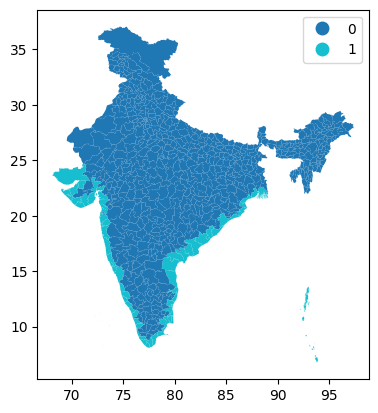

In [50]:
gdf.plot(column='coast', categorical= True, legend=True)

## Human Development Index

In [51]:
import pandas as pd

In [52]:
from unidecode import unidecode

gdf['no_accent'] = [unidecode(x) for x in gdf['adm1']]

In [53]:
hdi = pd.read_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/demographic/india/GDL-Subnational-HDI-data-4.csv')

In [54]:
hdi['Region'] = [x.replace('New Delhi', 'Delhi') for x in hdi['Region']]
hdi['Region'] = [x.replace('Chandigarth', 'Chandigarh') for x in hdi['Region']]
hdi['Region'] = [x.replace('Orissa', 'Odisha') for x in hdi['Region']]
hdi['Region'] = [x.replace('Uttaranchal', 'Uttarakhand') for x in hdi['Region']]





In [55]:
hdi.rename(columns={'2021':'HDI'}, inplace=True)

In [56]:
gdf = gdf.merge(hdi[['Region', 'HDI']], left_on='no_accent', right_on='Region')

Text(0.5, 1.0, 'Provincial HDI India')

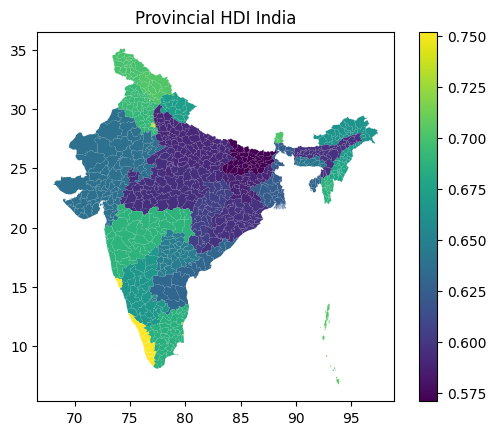

In [57]:
gdf.plot(column='HDI', legend=True)
plt.title('Provincial HDI India')

## Population density

In [ ]:
#link: https://hub.worldpop.org/geodata/listing?id=77
values = "/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/demographic/india/popdens/ind_pd_2020_1km_UNadj.tif"


stats = gpd.GeoDataFrame(zonal_stats(gdf, values, stats=["min", "max", "mean"]))
gdf = gdf.join(stats)


In [59]:
gdf.rename(columns={'mean':'popdens'}, inplace=True)

In [60]:
gdf = gdf[['adm1', 'adm2', 'geometry', 'mean_elev', 'location', 'coast', 'HDI', 'popdens']]

In [61]:
import glob

## Age (Using Global1 data)

In [ ]:
# sum all population totals above 60+

gdf['over60_pop'] = 0
for file in glob.glob('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/demographic/india/age/*'):
    
    values = file
    
    pop_total = gpd.GeoDataFrame(zonal_stats(gdf, values, stats=["sum"]))
    gdf['over60_pop'] += pop_total['sum']




In [ ]:
# divide 60+ age by total population to get population proportion above 60
for file in glob.glob('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/demographic/india/pop/*'):
    
    values = file
    
    pop_sum = gpd.GeoDataFrame(zonal_stats(gdf, values, stats=["sum"]))
    gdf['pop_total'] = pop_sum['sum']

In [13]:
gdf['over60_propor'] = gdf['over60_pop'] / gdf['pop_total']

Text(0.5, 1.0, 'Age 60+ population proportion')

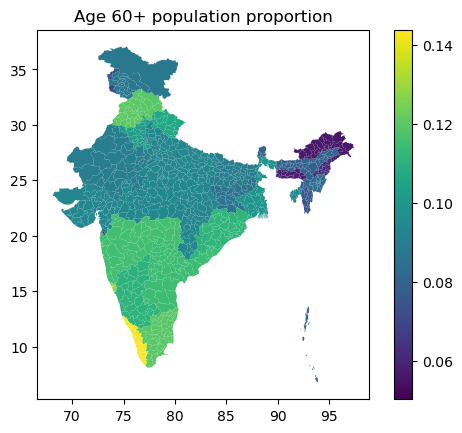

In [15]:
gdf.plot(column='over60_propor', legend=True)
plt.title("Age 60+ population proportion")

Text(0.5, 1.0, 'Age 60+ population proportion')

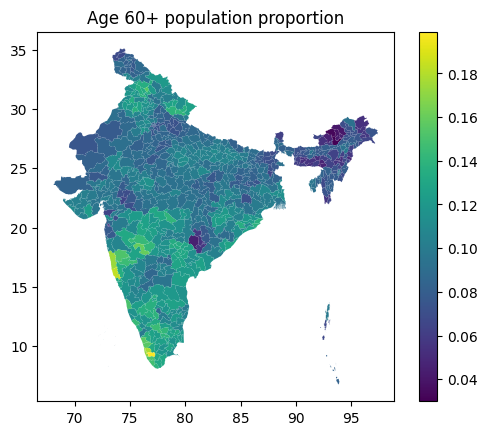

In [66]:
gdf.plot(column='over60_dec', legend=True)
plt.title("Age 60+ population proportion")

In [ ]:
HDI_subset = gdf.drop_duplicates('HDI')

In [ ]:
deciles = pd.qcut(HDI_subset['HDI'], 10, labels= range(1,11)).astype(int)
HDI_subset['HDI_dec'] = deciles
gdf = gdf.merge(HDI_subset[['HDI', 'HDI_dec']], on='HDI')


gdf['popdens_dec'] = pd.qcut(gdf['popdens'], 10, labels= range(1,11)).astype(int)
gdf['over60_dec'] = pd.qcut(gdf['over60_propor'], 10, labels= range(1,11)).astype(int)

/Users/shivyucel/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
gdf.to_file('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/physical/india/merged.shp')

/var/folders/8g/qp1k_1g91m5f2m9pypxwxdhh0000gn/T/ipykernel_64846/357948751.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/physical/india/merged.shp')
